In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from get_calib_dictionary import load_calib_factor_grid
from eis_calibration.eis_calib_2023 import interpol_eis_ea, eis_ea


Duplicate key in file PosixPath('/Users/andysh.to/miniconda3/envs/solar/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 271 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Missing colon in file PosixPath('/Users/andysh.to/miniconda3/envs/solar/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 387 (' Font sizes')
Duplicate key in file PosixPath('/Users/andysh.to/miniconda3/envs/solar/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 388 ('axes.titlesize       : 18     # FS_TITLE')
Duplicate key in file PosixPath('/Users/andysh.to/miniconda3/envs/solar/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 389 ('axes.labelsize       : 16     # FS_LABEL')
Duplicate key in file PosixPath('/Users/andysh.to/miniconda3/envs/solar/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 394 

 b'2008-04-01T12:00:00.000' b'2008-10-01T12:00:00.000'
 b'2009-04-01T12:00:00.000' b'2009-10-01T12:00:00.000'
 b'2010-04-01T12:00:00.000' b'2010-10-01T12:00:00.000'
 b'2011-04-01T12:00:00.000' b'2011-10-01T12:00:00.000'
 b'2012-04-01T12:00:00.000' b'2012-10-01T12:00:00.000'
 b'2013-04-01T12:00:00.000' b'2013-10-01T12:00:00.000'
 b'2014-04-01T12:00:00.000' b'2014-10-01T12:00:00.000'
 b'2015-04-01T12:00:00.000' b'2015-10-01T12:00:00.000'
 b'2016-04-01T12:00:00.000' b'2016-10-01T12:00:00.000'
 b'2017-04-01T12:00:00.000' b'2017-10-01T12:00:00.000'
 b'2018-04-01T12:00:00.000' b'2018-10-01T12:00:00.000'
 b'2019-04-01T12:00:00.000' b'2019-10-01T12:00:00.000'
 b'2020-04-01T12:00:00.000' b'2020-10-01T12:00:00.000'
 b'2021-04-01T12:00:00.000' b'2021-10-01T12:00:00.000'
 b'2022-04-01T12:00:00.000']. Returning first fit calibration


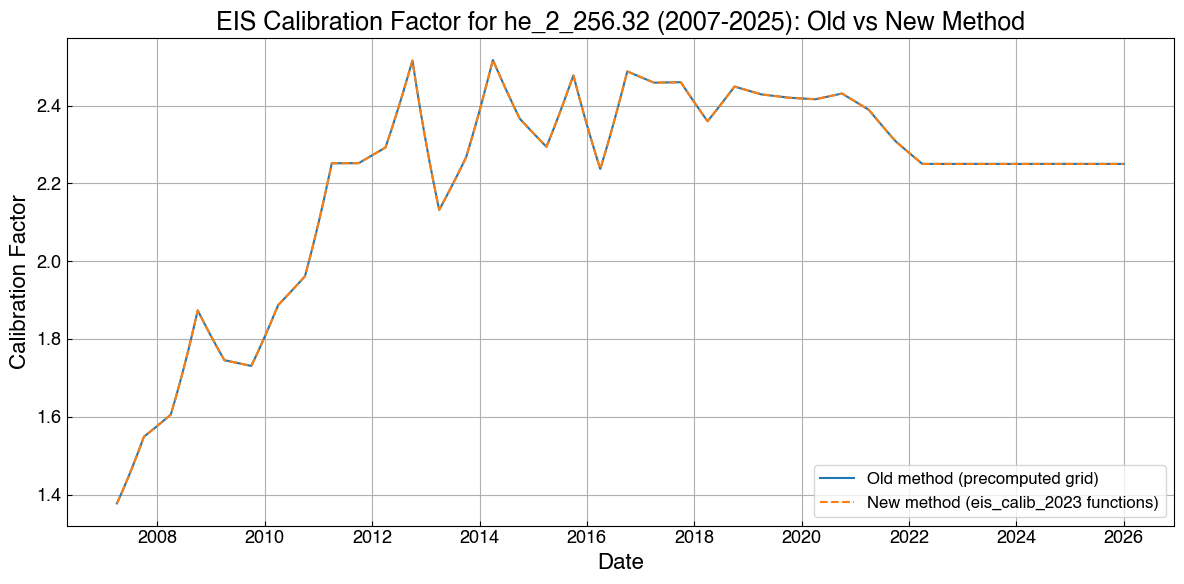

In [2]:

# Load the calibration factor grida (old method)
dates, wavelengths, calib_factors = load_calib_factor_grid('/Users/andysh.to/Script/Python_Script/asheis/calib_factor_grid.pkl')
he2_wvl = 256.32

# Prepare date range for plotting (use the same as in the grid)
date_objs = [datetime.datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates]

# --- Old method: from precomputed grid ---
# Find the closest wavelength in the grid (should be exact, but just in case)
wvl_idx = np.argmin(np.abs(wavelengths - he2_wvl))
he2_calib_old = calib_factors[:, wvl_idx]

# --- New method: using interpol_eis_ea and eis_ea ---
# For each date, compute the calibration factor using the new method
he2_calib_new = []
for d in dates:
    # eis_ea(wvl) is the pre-launch effective area, interpol_eis_ea(date, wvl) is the time-dependent one
    # The ratio gives the calibration factor
    try:
        new_factor = eis_ea(he2_wvl) / interpol_eis_ea(d, he2_wvl)
    except Exception as e:
        # If there is an error (e.g., date out of range), use np.nan
        new_factor = np.nan
    he2_calib_new.append(new_factor)
he2_calib_new = np.array(he2_calib_new)

# --- Plot both methods ---
plt.figure(figsize=(12, 6))
plt.plot(date_objs, he2_calib_old, label='Old method (precomputed grid)', color='tab:blue')
plt.plot(date_objs, he2_calib_new, label='New method (eis_calib_2023 functions)', color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Calibration Factor')
plt.title('EIS Calibration Factor for he_2_256.32 (2007-2025): Old vs New Method')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
